In [2]:
import json
from elasticsearch import Elasticsearch
host = "https://7771acde721f4a6bafa7cc6819bf7a45.us-east-1.aws.found.io:9243"
username = "onur"
pw = ""
es = Elasticsearch([host], http_auth=(username,pw))

In [23]:
## for entity term search, use entity.keyword

def search_query(first_day, second_day, keyword):
    '''
    Takes two time stamps in string format, take one entity keyword also in string format,
    and return the total number of hits on this entity during this time interval.
    '''
    res = es.search(
        index="tracking_events_prod", 
        body={
            "query": {
            "bool": {
              "must": [],
              "filter": [
                {
                  "bool": {
                    "should": [
                      {
                        "match": {
                          "entity.keyword": keyword
                        }
                      }
                    ],
                    "minimum_should_match": 1  ###not necessary
                  }
                },
                {
                  "range": {
                    "event_datetime": {
                      "format": "strict_date_optional_time",
                      "gte": first_day,
                      "lte": second_day
                    }
                  }
                }
              ],
              "should": [],
              "must_not": []
            }
          }
        })

    return res["hits"]["total"]["value"]


In [52]:
from datetime import datetime  
from datetime import timedelta  

time_range = ["2020-01-01T17:20:25.832Z"]
string_format = "%Y-%m-%d"
extra_string = "T17:20:25.832Z"
first_day = "2020-01-01" 
time_interval = timedelta(days = 1)  
for i in range(123):
    second_day = datetime.strptime(first_day, string_format) + time_interval
    time_range.append(second_day.strftime("%Y-%m-%d") + extra_string)
    first_day = second_day.strftime("%Y-%m-%d")
time_range

['2020-01-01T17:20:25.832Z',
 '2020-01-02T17:20:25.832Z',
 '2020-01-03T17:20:25.832Z',
 '2020-01-04T17:20:25.832Z',
 '2020-01-05T17:20:25.832Z',
 '2020-01-06T17:20:25.832Z',
 '2020-01-07T17:20:25.832Z',
 '2020-01-08T17:20:25.832Z',
 '2020-01-09T17:20:25.832Z',
 '2020-01-10T17:20:25.832Z',
 '2020-01-11T17:20:25.832Z',
 '2020-01-12T17:20:25.832Z',
 '2020-01-13T17:20:25.832Z',
 '2020-01-14T17:20:25.832Z',
 '2020-01-15T17:20:25.832Z',
 '2020-01-16T17:20:25.832Z',
 '2020-01-17T17:20:25.832Z',
 '2020-01-18T17:20:25.832Z',
 '2020-01-19T17:20:25.832Z',
 '2020-01-20T17:20:25.832Z',
 '2020-01-21T17:20:25.832Z',
 '2020-01-22T17:20:25.832Z',
 '2020-01-23T17:20:25.832Z',
 '2020-01-24T17:20:25.832Z',
 '2020-01-25T17:20:25.832Z',
 '2020-01-26T17:20:25.832Z',
 '2020-01-27T17:20:25.832Z',
 '2020-01-28T17:20:25.832Z',
 '2020-01-29T17:20:25.832Z',
 '2020-01-30T17:20:25.832Z',
 '2020-01-31T17:20:25.832Z',
 '2020-02-01T17:20:25.832Z',
 '2020-02-02T17:20:25.832Z',
 '2020-02-03T17:20:25.832Z',
 '2020-02-04T1

In [21]:
f = open('data/100entities.txt', 'r')
top_entities = f.read().splitlines()
top_entities[1:10]

['Link Intime India',
 'Eminem',
 'Post Malone',
 '50 Cent',
 'Ozzy Osbourne',
 'R. Kelly',
 'Machine Gun Kelly',
 'LOS ANGELES',
 'Luke Bryan']

In [29]:
HITS = []
for i in range(10):  #len(top_entities)
    print("i = ", i, top_entities[i])
    hits = []
    for j in range(len(time_range)-1):
        print("j = ", j)
        hits.append(search_query(time_range[j], time_range[j+1], top_entities[i]))
    HITS.append(hits)

i =  0 Instagram
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j = 

j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  9 Luke Bryan
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j

NameError: name 'pd' is not defined

In [67]:
date_df = pd.DataFrame(time_range)
date_df[0] = date_df[0].apply(lambda x: x[0:10])
dates = date_df[0].to_list()[0:123]

In [70]:
import pandas as pd
time_df = pd.DataFrame(HITS, columns = dates)
time_df = time_df.iloc[:,1:]
time_df

,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
0,1157,1390,1503,1583,1205,1402,2226,2067,2292,2411,...,15,6,5,9,6,4,12,15,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,26,71,14,13,6,5,9,17,13,7,...,25,98,104,61,53,35,89,676,135,40
3,12,13,13,9,19,10,15,8,8,12,...,199,2003,1942,538,246,155,56,56,15,48
4,34,87,61,51,158,388,202,18,8,12,...,79,141,40,41,13,5,32,4186,3207,1580
5,10,2,0,2,3,1,0,4,8,12,...,28,21,22,12,7,27,17,14,7,7
6,172,245,273,113,26,23,780,276,423,872,...,4,0,0,3,0,0,0,0,0,0
7,3,0,1,0,8,6,4,2,3,2,...,144,167,99,33,964,717,186,1001,1108,309
8,0,0,0,0,0,0,0,0,0,0,...,11,3,4,7,5,5,4,5,4,13
9,0,0,0,0,0,0,0,0,0,0,...,36,24,155,157,150,178,27,229,158,181


In [71]:
time_df['entity'] = top_entities[0:10]
time_df

,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,...,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,entity
0,1157,1390,1503,1583,1205,1402,2226,2067,2292,2411,...,6,5,9,6,4,12,15,2,2,Instagram
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,Link Intime India
2,26,71,14,13,6,5,9,17,13,7,...,98,104,61,53,35,89,676,135,40,Eminem
3,12,13,13,9,19,10,15,8,8,12,...,2003,1942,538,246,155,56,56,15,48,Post Malone
4,34,87,61,51,158,388,202,18,8,12,...,141,40,41,13,5,32,4186,3207,1580,50 Cent
5,10,2,0,2,3,1,0,4,8,12,...,21,22,12,7,27,17,14,7,7,Ozzy Osbourne
6,172,245,273,113,26,23,780,276,423,872,...,0,0,3,0,0,0,0,0,0,R. Kelly
7,3,0,1,0,8,6,4,2,3,2,...,167,99,33,964,717,186,1001,1108,309,Machine Gun Kelly
8,0,0,0,0,0,0,0,0,0,0,...,3,4,7,5,5,4,5,4,13,LOS ANGELES
9,0,0,0,0,0,0,0,0,0,0,...,24,155,157,150,178,27,229,158,181,Luke Bryan


In [72]:
time_df_plot = time_df.set_index('entity').stack().reset_index(name='hits').rename(columns={'level_1':'dates'})
time_df_plot

,entity,dates,hits
0,Instagram,2020-01-02,1157
1,Instagram,2020-01-03,1390
2,Instagram,2020-01-04,1503
3,Instagram,2020-01-05,1583
4,Instagram,2020-01-06,1205
...,...,...,...
1215,Luke Bryan,2020-04-28,178
1216,Luke Bryan,2020-04-29,27
1217,Luke Bryan,2020-04-30,229
1218,Luke Bryan,2020-05-01,158


In [73]:
time_df_plot.to_csv("data/top_10_entities_time_plot.csv")

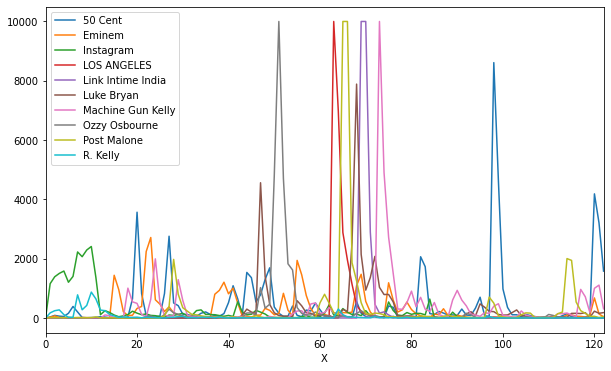

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,6)) 
for n, group in time_df_plot.groupby('entity'):
    group.plot(x='X',y='hits', ax = ax,label = n)

In [47]:
fig.savefig('data/top10entities.png')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def create_time_series_df(num_entities):

    HITS = []
    for i in range(num_entities):  #len(top_entities)
        print("i = ", i, top_entities[i])
        hits = []
        for j in range(len(time_range)-1):
            print("j = ", j)
            hits.append(search_query(time_range[j], time_range[j+1], top_entities[i]))
        HITS.append(hits)

    time_df = pd.DataFrame(HITS)
    time_df['entity'] = top_entities[0:num_entities]
    time_df_plot = time_df.set_index('entity').stack().reset_index(name='hits').rename(columns={'level_1':'dates'})
    time_df_plot.to_csv("data/top_100_entities_time_plot_df.csv")
    
    return HITS, time_df_plot

HITS_all, DF = create_time_series_df(100)
DF

i =  0 Instagram
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j = 

j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  9 Luke Bryan
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j

j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  17 State Bank of India
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21

j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  25 Nick Cannon
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29

j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  33 DaBaby
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j = 

j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  41 Goofy
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  

j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  49 Bob Dylan
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j

j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  57 Nipsey Hussle
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  

j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  65 Facebook
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j 

j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  73 Usher
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  

j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  81 Eddie Money
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j

j =  121
j =  122
i =  89 Lil Nas X
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =

j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
i =  98 Funeral
j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =

,entity,dates,hits
0,Instagram,0,1305
1,Instagram,1,1157
2,Instagram,2,1390
3,Instagram,3,1503
4,Instagram,4,1583
...,...,...,...
12295,Metal,118,664
12296,Metal,119,2746
12297,Metal,120,4775
12298,Metal,121,1919


In [88]:
time_df_all = pd.DataFrame(HITS_all, columns = dates)
time_df_all = time_df_all.iloc[:,1:]
time_df_all['entity'] = top_entities[0:100]
time_df_plot_all = time_df_all.set_index('entity').stack().reset_index(name='hits').rename(columns={'level_1':'dates'})
time_df_plot_all.to_csv("data/top_100_entities_time_plot_df.csv")

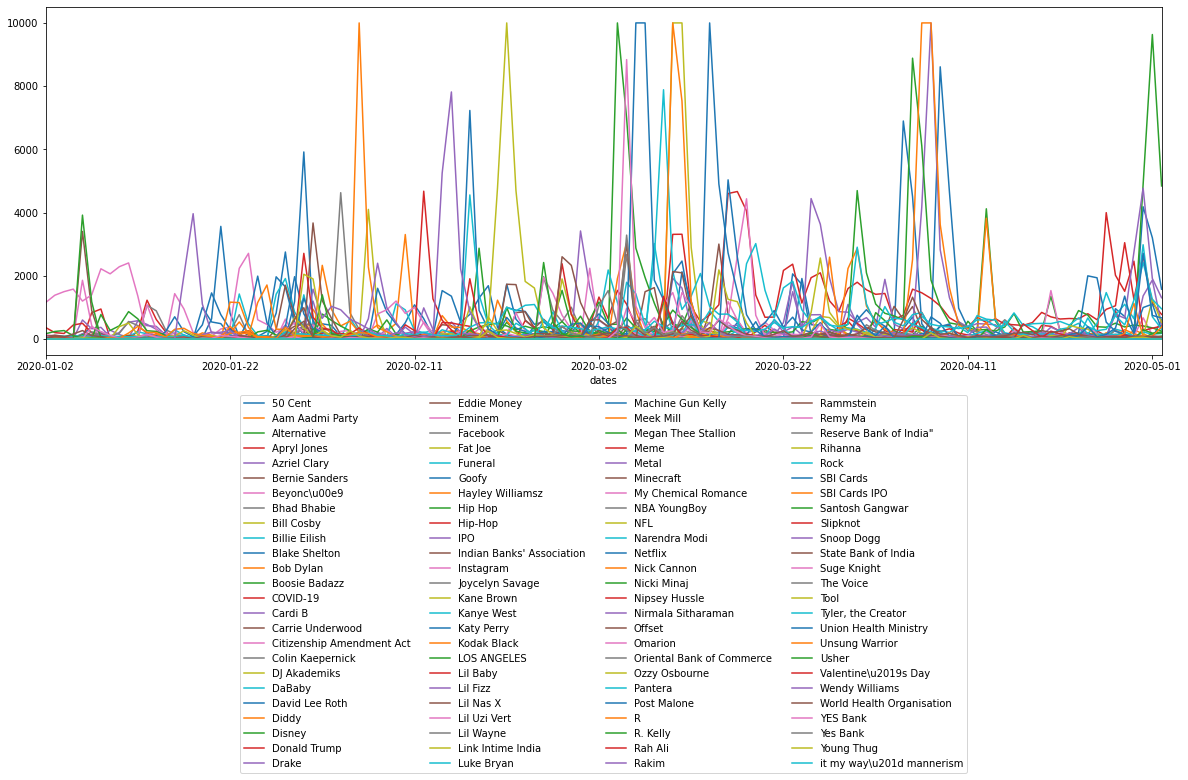

In [89]:
fig, ax = plt.subplots(figsize=(20,8)) 
for n, group in time_df_plot_all.groupby('entity'):
    group.plot(x='dates',y='hits', ax = ax,label = n)
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])

# Put a legend to the right of the current axis
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.1))

In [90]:
fig.savefig('data/top100entities.png')